1.競賽簡介及選擇原因

在這次的期中作業我選擇的題目是房價預測，是Kaggle上的標籤getting started裡的競賽，也是老師推薦可以參加的題目，因為與課堂上的鐵達尼號有類似的實作內容，然而我也思考到剛踏入這個領域先小試身手一下，而且新手競賽也會比較多參賽者所留下的程式碼可以參考，不會導致太多的麻煩與錯誤。接著是其競賽的目標是希望參賽者能寫python或R語言，建構出房價預測的模型。

2.1 導入需要使用的套件

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

2.2 匯入訓練與測試的資料

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


2.3 觀察train與test的缺失值個數

In [4]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

2.4 查看其中的缺失狀況

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
null_var = train.isna().sum() / train.shape[0] * 100
null_var

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

2.5 篩選其欄位有過多無用值

In [8]:
drop_columns = null_var[null_var > 17].keys()
drop_columns

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

2.6 將篩選出來的欄位刪除

In [9]:
train_df = train.drop(columns = drop_columns)
train_df.shape

(1460, 75)

<AxesSubplot:>

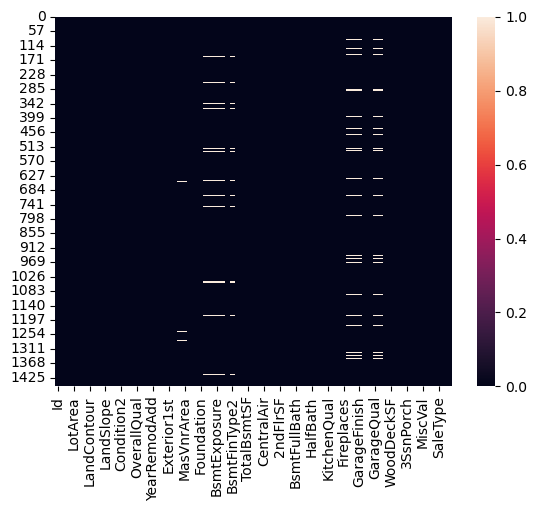

In [10]:
test_df = test.drop(columns = drop_columns)
sns.heatmap(train_df.isna())

In [11]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

<AxesSubplot:xlabel='MSSubClass', ylabel='Density'>

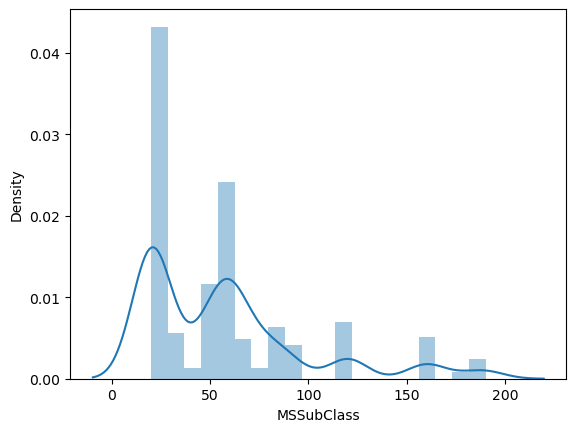

In [12]:
sns.distplot(train_df['MSSubClass'])

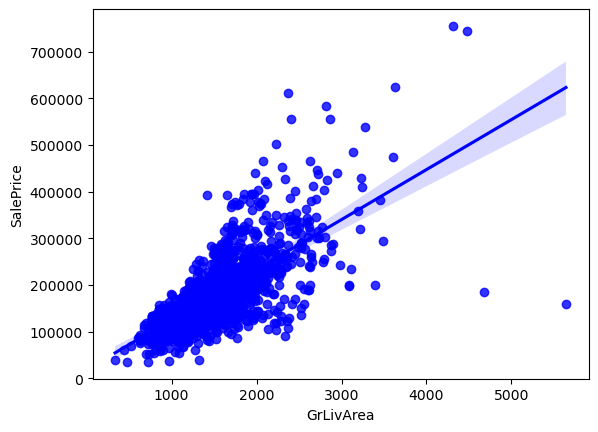

In [13]:
sns.regplot(x = 'GrLivArea', y = 'SalePrice', color = 'blue', data = train)
plt.show()

In [14]:
train_df.select_dtypes(include = ['int64', 'float64']).columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [15]:
test_df.select_dtypes(include = ['int64', 'float64']).columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [16]:
num_var = ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice']

In [17]:
num_var1 = ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']

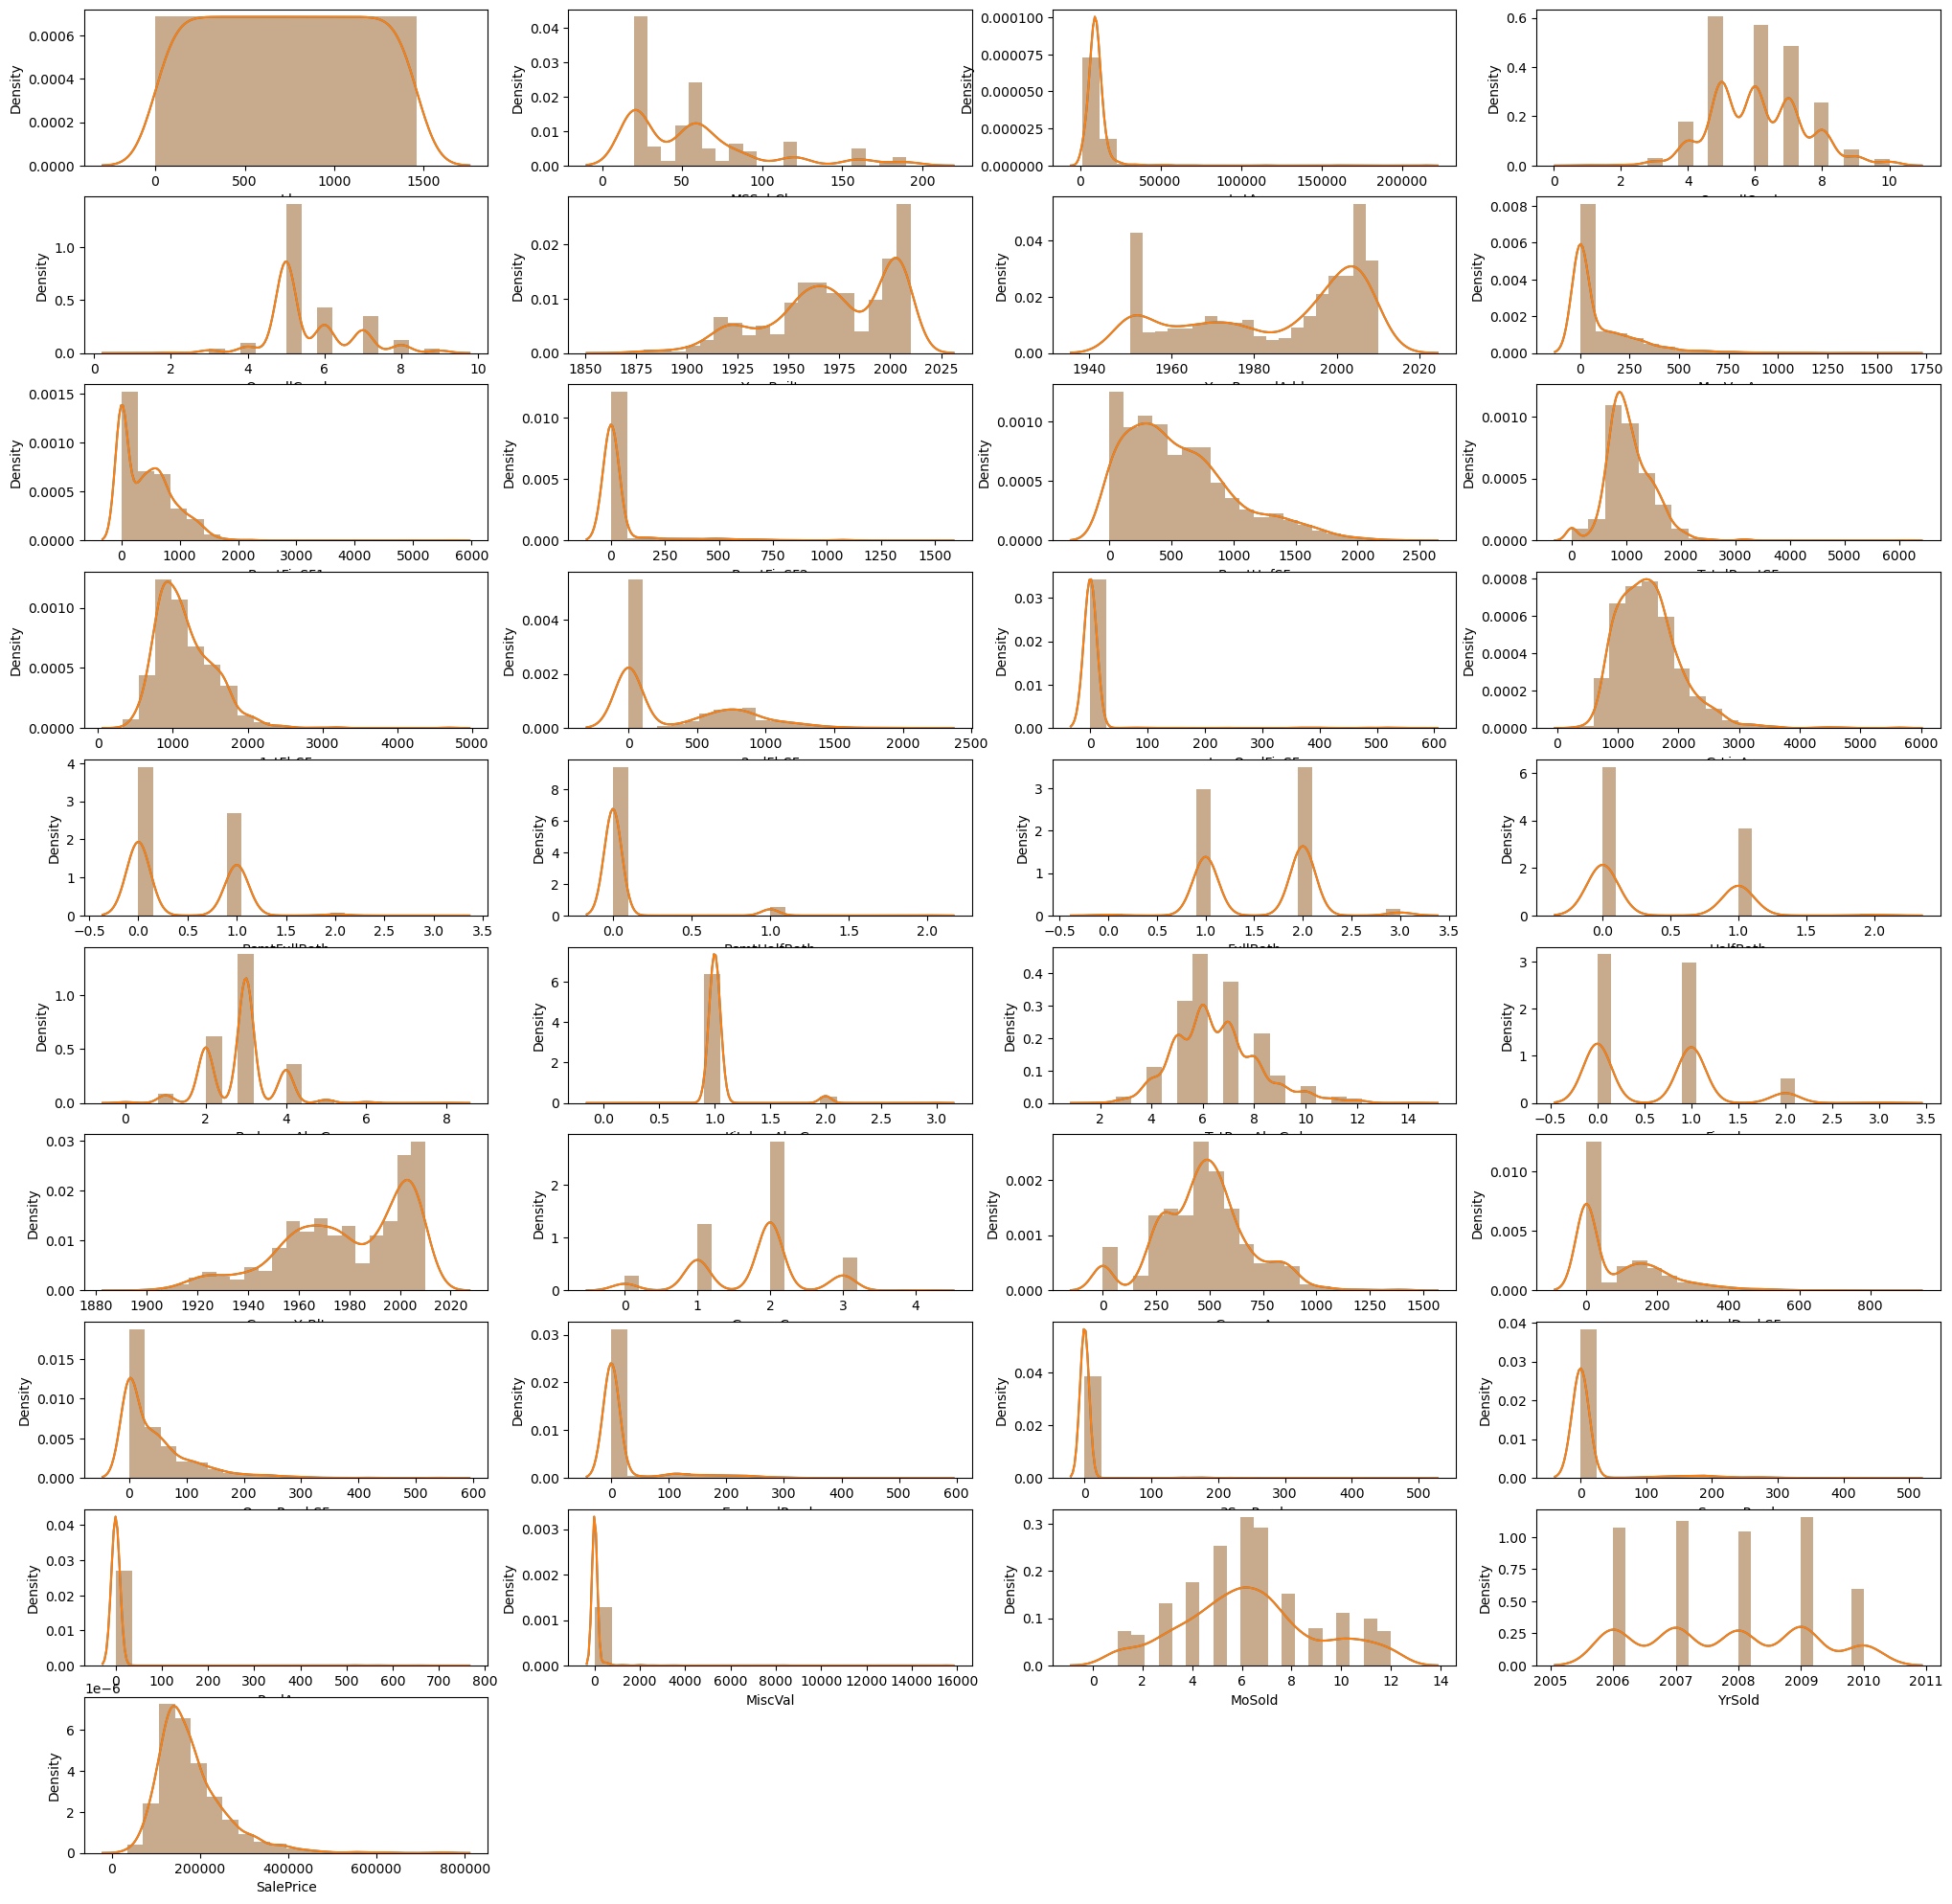

In [18]:
plt.figure(figsize = (25, 25))
for i, var in enumerate(num_var):
  plt.subplot(10, 4, i + 1)
  sns.distplot(train[var], bins = 20)
  sns.distplot(train_df[var], bins = 20)
plt.show()

In [19]:
cat_var = train_df.select_dtypes(include = ['O']).columns
cat_var1 = test_df.select_dtypes(include = ['O']).columns

2.7 將缺失值填入平均數

In [20]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'mean')
imputer.fit(train_df[num_var])

SimpleImputer()

In [23]:
imputer.statistics_

array([7.30500000e+02, 5.68972603e+01, 1.05168281e+04, 6.09931507e+00,
       5.57534247e+00, 1.97126781e+03, 1.98486575e+03, 1.03685262e+02,
       4.43639726e+02, 4.65493151e+01, 5.67240411e+02, 1.05742945e+03,
       1.16262671e+03, 3.46992466e+02, 5.84452055e+00, 1.51546370e+03,
       4.25342466e-01, 5.75342466e-02, 1.56506849e+00, 3.82876712e-01,
       2.86643836e+00, 1.04657534e+00, 6.51780822e+00, 6.13013699e-01,
       1.97850616e+03, 1.76712329e+00, 4.72980137e+02, 9.42445205e+01,
       4.66602740e+01, 2.19541096e+01, 3.40958904e+00, 1.50609589e+01,
       2.75890411e+00, 4.34890411e+01, 6.32191781e+00, 2.00781575e+03,
       1.80921196e+05])

2.8 填入平均數後，補回train中

In [24]:
imputer.fit_transform(train_df[num_var])

array([[1.00000e+00, 6.00000e+01, 8.45000e+03, ..., 2.00000e+00,
        2.00800e+03, 2.08500e+05],
       [2.00000e+00, 2.00000e+01, 9.60000e+03, ..., 5.00000e+00,
        2.00700e+03, 1.81500e+05],
       [3.00000e+00, 6.00000e+01, 1.12500e+04, ..., 9.00000e+00,
        2.00800e+03, 2.23500e+05],
       ...,
       [1.45800e+03, 7.00000e+01, 9.04200e+03, ..., 5.00000e+00,
        2.01000e+03, 2.66500e+05],
       [1.45900e+03, 2.00000e+01, 9.71700e+03, ..., 4.00000e+00,
        2.01000e+03, 1.42125e+05],
       [1.46000e+03, 2.00000e+01, 9.93700e+03, ..., 6.00000e+00,
        2.00800e+03, 1.47500e+05]])

In [25]:
train_df[num_var] = imputer.transform(train_df[num_var])

2.9 檢查有無N/A值

In [26]:
train_df[num_var].isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [28]:
cat_imputer = SimpleImputer(strategy = 'most_frequent')
train_df[cat_var] = cat_imputer.fit_transform(train_df[cat_var])

In [29]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

In [30]:
for var in cat_var:
    train_df[var] = le.fit_transform(train_df[var])

In [31]:
train_df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

<AxesSubplot:>

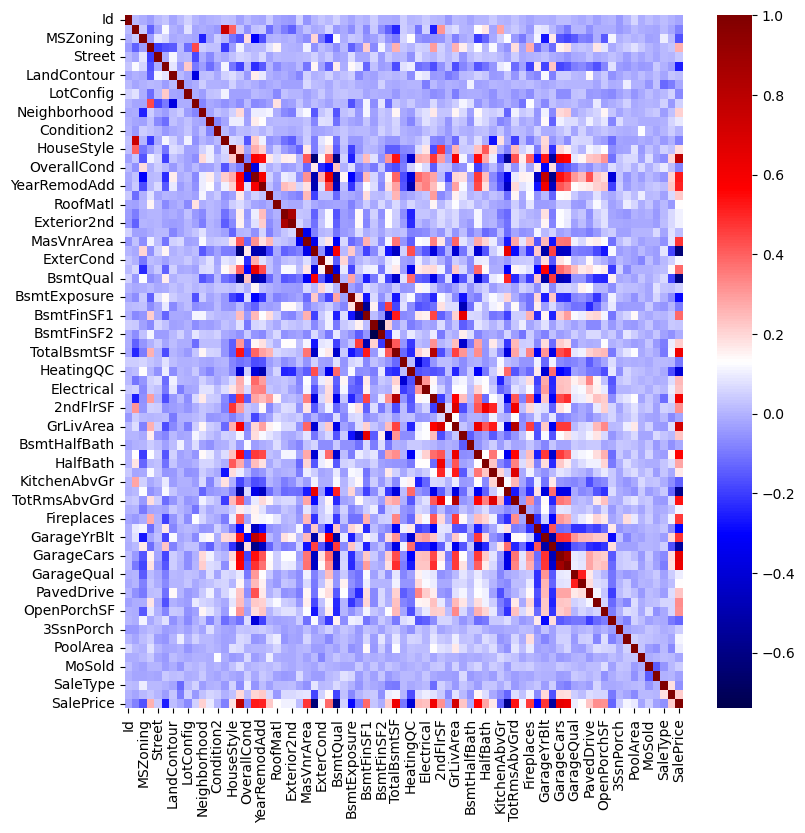

In [32]:
plt.figure(figsize = (9, 9))
sns.heatmap(train_df.corr(),cmap = "seismic")

2.10 然而test的欄位尚無更動，所以必須作與train相同的調整與檢測

In [33]:
imputer = SimpleImputer(strategy = 'mean')
imputer.fit(test_df[num_var1])

SimpleImputer()

In [34]:
imputer.statistics_

array([2.19000000e+03, 5.73783413e+01, 9.81916107e+03, 6.07882111e+00,
       5.55380398e+00, 1.97135778e+03, 1.98366278e+03, 1.00709141e+02,
       4.39203704e+02, 5.26193416e+01, 5.54294925e+02, 1.04611797e+03,
       1.15653461e+03, 3.25967786e+02, 3.54352296e+00, 1.48604592e+03,
       4.34454358e-01, 6.52024708e-02, 1.57093900e+00, 3.77655929e-01,
       2.85400960e+00, 1.04249486e+00, 6.38519534e+00, 5.81220014e-01,
       1.97772122e+03, 1.76611797e+00, 4.72768861e+02, 9.31747772e+01,
       4.83139136e+01, 2.42433173e+01, 1.79437971e+00, 1.70644277e+01,
       1.74434544e+00, 5.81679232e+01, 6.10418095e+00, 2.00776971e+03])

In [ ]:
imputer.fit_transform(train_df[num_var1])

In [35]:
test_df[num_var1] = imputer.transform(test_df[num_var1])

In [36]:
test_df[num_var1].isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [37]:
cat_imputer = SimpleImputer(strategy = 'most_frequent')
test_df[cat_var1] = cat_imputer.fit_transform(test_df[cat_var1])

In [38]:
test_df[cat_var1].isna().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [39]:
for var in cat_var1:
    test_df[var] = le.fit_transform(test_df[var])

In [40]:
test_df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 74, dtype: int64

2.11 確認train與test皆無缺失值

In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   int32  
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   int32  
 5   LotShape       1460 non-null   int32  
 6   LandContour    1460 non-null   int32  
 7   Utilities      1460 non-null   int32  
 8   LotConfig      1460 non-null   int32  
 9   LandSlope      1460 non-null   int32  
 10  Neighborhood   1460 non-null   int32  
 11  Condition1     1460 non-null   int32  
 12  Condition2     1460 non-null   int32  
 13  BldgType       1460 non-null   int32  
 14  HouseStyle     1460 non-null   int32  
 15  OverallQual    1460 non-null   float64
 16  OverallCond    1460 non-null   float64
 17  YearBuilt      1460 non-null   float64
 18  YearRemo

In [42]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   float64
 1   MSSubClass     1459 non-null   float64
 2   MSZoning       1459 non-null   int32  
 3   LotArea        1459 non-null   float64
 4   Street         1459 non-null   int32  
 5   LotShape       1459 non-null   int32  
 6   LandContour    1459 non-null   int32  
 7   Utilities      1459 non-null   int32  
 8   LotConfig      1459 non-null   int32  
 9   LandSlope      1459 non-null   int32  
 10  Neighborhood   1459 non-null   int32  
 11  Condition1     1459 non-null   int32  
 12  Condition2     1459 non-null   int32  
 13  BldgType       1459 non-null   int32  
 14  HouseStyle     1459 non-null   int32  
 15  OverallQual    1459 non-null   float64
 16  OverallCond    1459 non-null   float64
 17  YearBuilt      1459 non-null   float64
 18  YearRemo

3.1 開始建立模型訓練

In [43]:
x = train_df.iloc[:,:-1]
x.shape

(1460, 74)

In [44]:
y = train_df['SalePrice']
y.shape

(1460,)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 42)

In [47]:
rgr = LinearRegression()
rgr.fit(x_train, y_train)
rgr.score(x_test, y_test)

0.8517614364981976

In [49]:
import xgboost as xgb
import catboost as cat
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

3.2 參考來源資料後，調整模型參數

In [51]:
xgb_model = xgb.XGBRegressor(
                       learning_rate = 0.1,
                       n_estimators = 1000,
                       max_depth = 11,
                       min_child_weight = 0,
                       gamma = 0.7,
                       subsample = 1,
                       colsample_bytree = 0.7,
                       nthread = -1,
                       scale_pos_weight = 1,
                       seed = 27,
                       random_state = 42)
xgb_model.fit(x_train, y_train)
xgb_model.score(x_test, y_test)

0.9098247687995433

In [52]:
y_prediction = xgb_model.predict(test_df)

3.3 匯出預測pkl

In [53]:
import joblib
joblib.dump(xgb_model,'midterm_108403541.pkl',compress = 3)

['midterm_108403541.pkl']

3.4 建立預測CSV

In [54]:
midtermDF = pd.DataFrame(columns = ['Id', 'SalePrice'])
midtermDF['Id'] = range(1461, 2920)
midtermDF['SalePrice'] = y_prediction
midtermDF

,Id,SalePrice
0,1461,128994.078125
1,1462,155715.500000
2,1463,179143.437500
3,1464,189605.437500
4,1465,203982.265625
...,...,...
1454,2915,84785.421875
1455,2916,88036.492188
1456,2917,167619.578125
1457,2918,108275.671875


3.5 匯出CSV

In [55]:
midtermDF.to_csv('midterm_108403541.csv', index = False)

4. 心得

最終排名:1901名 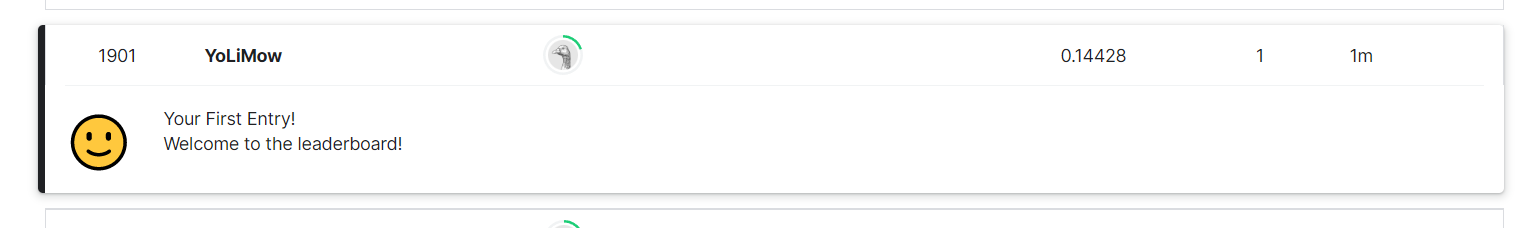
當初與同學一起選擇這項競賽，當時在挑選參考資料時發現這個預測準度不錯所以選擇了他，但是之後自己撰寫程式碼後發現其實其中有不完善的地方，他前處理沒有針對test下去做整理卻可以跑出成績，所以我必須再多做一步去對test做前處理才可以完整跑出來。不過我從中了解到資料的前處理是對預測有相當大的幫助，不會在訓練模型時造成不必要的干擾，然而在模型建立我還時參加其模型架構才會得出相當高的成績。

參考網址: https://www.kaggle.com/code/smnuruzzaman/house-price-90/notebook